In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow import keras
from tensorflow.keras import layers, activations
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np
from keras.models import Sequential
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

In [4]:
# Open the .csv file with all labels
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/labels.csv')

In [5]:
# Show labels
df.head()

,File,Label
0,COA_8907-1_20180620_200100_part_061.png,Noise
1,COA_8907-1_20180620_210103_part_172.png,Noise
2,COA_8907-1_20180620_210103_part_185.png,Noise
3,COA_8907-1_20180620_210103_part_201.png,Noise
4,COA_8907-1_20180620_220103_part_117.png,Noise


In [6]:
# Converting each class name label in a column to a list
df['Label']=df['Label'].apply(lambda x:str(x).split('+')) #.fillna("")

In [7]:
print(df['Label'])

0         [Noise]
1         [Noise]
2         [Noise]
3         [Noise]
4         [Noise]
           ...   
164206    [Noise]
164207    [Noise]
164208    [Noise]
164209    [Noise]
164210      [nan]
Name: Label, Length: 164211, dtype: object


In [8]:
# Transforming images
datagen=ImageDataGenerator(rescale=1./255.)
test_datagen=ImageDataGenerator(rescale=1./255.)

In [9]:
# Splitting the data for training and defining classes
train_generator=datagen.flow_from_dataframe(
dataframe=df[:10000],
directory='/content/drive/MyDrive/Colab Notebooks/imgs.zip (Unzipped Files)/imgs',
x_col='File',
y_col='Label',
batch_size=32,
seed=42,
shuffle=True,
class_mode='categorical',
color_mode='grayscale',
classes=['Noise', 'GLGN', 'MEKE', 'AEAC', 'STVA', 'BUVI', 'STOC'],
target_size=(129,500))

Found 9981 validated image filenames belonging to 7 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 19 invalid image filename(s) in x_col="File". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [10]:
# Splitting the data for validation and defining classes
valid_generator=test_datagen.flow_from_dataframe(
dataframe=df[32000:34000],
directory='/content/drive/MyDrive/Colab Notebooks/imgs.zip (Unzipped Files)/imgs',
x_col='File',
y_col='Label',
batch_size=32,
seed=42,
shuffle=True,
class_mode='categorical',
color_mode='grayscale',
classes=['Noise', 'GLGN', 'MEKE', 'AEAC', 'STVA', 'BUVI', 'STOC'],
target_size=(129,500))

Found 2000 validated image filenames belonging to 7 classes.


In [11]:
# Splitting the data for testing
test_generator=test_datagen.flow_from_dataframe(
dataframe=df[100000:102000],
directory='/content/drive/MyDrive/Colab Notebooks/imgs.zip (Unzipped Files)/imgs',
x_col='File',
batch_size=1,
seed=42,
shuffle=False,
class_mode=None,
color_mode='grayscale',
target_size=(129,500))

Found 2000 validated image filenames.


In [14]:
# Initialising the model
model = Sequential()

# Adding the Convolutional layer
model.add(Conv2D(32, (3,3), input_shape = (129,500,1), activation=activations.relu))
# Adding the Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Adding the Convolutional layer
model.add(Conv2D(32, (3,3), activation=activations.relu))
# Adding the Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# Implementing dropout
model.add(Dropout(0.2))

# Adding the Convolutional layer
model.add(Conv2D(64, (3,3), activation=activations.relu))
# Adding the Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# Implementing dropout
model.add(Dropout(0.2))
 
# Adding the Convolutional layer
model.add(Conv2D(64, (3,3), activation=activations.relu))
# Adding the Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# Implementing dropout
model.add(Dropout(0.2))

# Adding the Flattening data 
model.add(Flatten())

# Adding a fully conected layer
model.add(Dense(64, activation=activations.relu))
# Implementing dropout
model.add(Dropout(0.5))

# Adding a fully conected layer
model.add(Dense(7, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

# Applying an optimizing algorithm
adam = keras.optimizers.Adam(lr=0.0001)

# Running the model
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Fitting the model
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=30
)

Epoch 1/30
311/311 [==============================] - 4045s 13s/step - loss: 1.3505 - accuracy: 0.5460 - val_loss: 0.7845 - val_accuracy: 0.8286
Epoch 2/30
311/311 [==============================] - 790s 3s/step - loss: 0.8519 - accuracy: 0.7808 - val_loss: 0.7742 - val_accuracy: 0.8211
Epoch 3/30
311/311 [==============================] - 790s 3s/step - loss: 0.7916 - accuracy: 0.7790 - val_loss: 0.7518 - val_accuracy: 0.8518
Epoch 4/30
311/311 [==============================] - 794s 3s/step - loss: 0.7239 - accuracy: 0.7940 - val_loss: 0.6966 - val_accuracy: 0.8523
Epoch 5/30
311/311 [==============================] - 791s 3s/step - loss: 0.5689 - accuracy: 0.8207 - val_loss: 0.5108 - val_accuracy: 0.9178
Epoch 6/30
311/311 [==============================] - 791s 3s/step - loss: 0.4380 - accuracy: 0.8760 - val_loss: 0.4716 - val_accuracy: 0.9219
Epoch 7/30
311/311 [==============================] - 790s 3s/step - loss: 0.3630 - accuracy: 0.9072 - val_loss: 0.4329 - val_accuracy: 0.92

In [16]:
# Save the model to disk.
model.save_weights('owls-cnn7.h5')

In [17]:
# Resetting the generator
test_generator.reset()
pred=model.predict(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

2000/2000 [==============================] - 927s 464ms/step


In [18]:
pred_bool = (pred > 0.5)

In [21]:
#acting like a test_generator, batch_size should be 1
model.evaluate(valid_generator, steps=STEP_SIZE_VALID) 

predictions=[]
labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
for row in pred_bool:
    l=[]
    for index,cls in enumerate(row):
        if cls:
            l.append(labels[index])
    predictions.append(",".join(l))
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

62/62 [==============================] - 37s 597ms/step - loss: 469.6106 - accuracy: 0.9204


In [24]:
df = pd.read_csv('results.csv')

In [25]:
print(df)

                                     Filename Predictions
0     COA_9580-5_20180514_065002_part_201.png       Noise
1     COA_9580-5_20180514_065002_part_216.png       Noise
2     COA_9580-5_20180514_065002_part_217.png       Noise
3     COA_9580-5_20180514_065002_part_218.png       Noise
4     COA_9580-5_20180514_065002_part_219.png       Noise
...                                       ...         ...
1995  COA_9580-5_20180520_064402_part_069.png       Noise
1996  COA_9580-5_20180520_064402_part_082.png       Noise
1997  COA_9580-5_20180520_064402_part_087.png       Noise
1998  COA_9580-5_20180520_064402_part_088.png       Noise
1999  COA_9580-5_20180520_064402_part_100.png       Noise

[2000 rows x 2 columns]


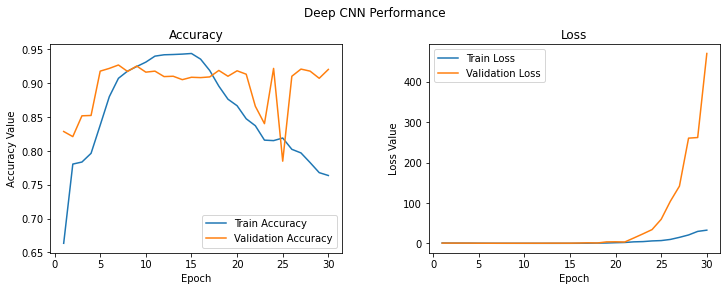

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Deep CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")